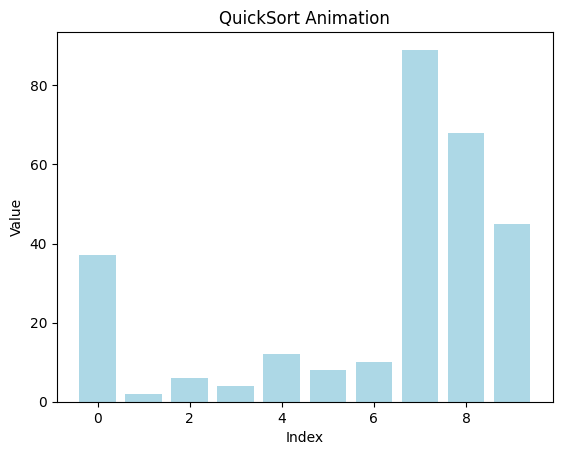

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

def partition(array, start, end, ax, bars, interval, swaps):
    pivot = array[start]
    left = start + 1
    right = end

    while True:
        while left <= right and array[left] <= pivot:
            left += 1

        while left <= right and array[right] >= pivot:
            right -= 1

        if left <= right:
            array[left], array[right] = array[right], array[left]
            swaps.append((left, right))
            update_plot(array, ax, bars, interval)
        else:
            array[start], array[right] = array[right], array[start]
            swaps.append((start, right))
            update_plot(array, ax, bars, interval)
            return right

def update_plot(array, ax, bars, interval):
    for bar, val in zip(bars, array):
        bar.set_height(val)
    plt.pause(interval)

def quick_sort_helper(array, start, end, ax, bars, interval, swaps):
    if start >= end:
        return

    pivot_index = partition(array, start, end, ax, bars, interval, swaps)

    quick_sort_helper(array, start, pivot_index - 1, ax, bars, interval, swaps)
    quick_sort_helper(array, pivot_index + 1, end, ax, bars, interval, swaps)

def quick_sort(array):
    fig, ax = plt.subplots()
    bars = ax.bar(range(len(array)), array, color='lightblue')
    ax.set_title('QuickSort Animation')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

    swaps = []
    interval = 0.1 

    writer = animation.FFMpegWriter(fps=30, metadata=dict(artist='Me'), bitrate=1800)

    with writer.saving(fig, "quicksort_animation.mp4", dpi=200):
        quick_sort_helper(array, 0, len(array) - 1, ax, bars, interval, swaps)
        
        for bar in bars:
            bar.set_color('green')

        plt.draw()
        writer.grab_frame()

array = [37, 2, 6, 4, 89, 8, 10, 12, 68, 45]

quick_sort(array)